MEUNIER Claire  
PICOT Morgane

# PROJET NUMERIQUE 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
#paramètres

alpha = 1.5
beta = 0.05
gamma = 0.48
delta = 0.05

In [3]:
#Equations de Lotka-Volterra

def LV(x, t=0, alpha = alpha,
          beta = beta,
          gamma = gamma,
          delta = delta):
    
    x1, x2 = x
    return np.array([x1*(alpha - beta*x2), -x2*(gamma - delta*x1)])

## Question 1

On dispose du système différentiel de Lotka-Volterra défini par :
$$
\begin{cases}
\dot x_1 = x_1(\alpha -\beta x_2) \\
\dot x_2 = - x_2( \gamma - \delta x_1) 
\end{cases}
$$  
  
  
où $x_1$ et $x_2$ définissent respectivement le nombre de proies et de prédateurs dans la simulation étudiée.  
Le paramètre $\alpha$ caractérise ainsi le taux de naissance au sein des proies, tandis que $\beta$ quantifie le taux de proies tuées par les prédateurs.
De la même manière, $\gamma$ donne le taux de mortalité des prédateurs et $\delta$ leur taux d réproduction en fonction des proies mangées.  
On constate immédiatement que le couple $(0, 0)$ est un point fixe du système. On remarque un autre point fixe : le point de coordonnées $(\frac{\gamma}{\delta}, \frac{\alpha}{\beta})$ que l'on notera $\bar x$.   
On cherche à évaluer leur stabilité. Pour cela, on définit la fonction $f : \mathbb{R}^2 \to\mathbb{R}^2$ telle que $\dot x = f(x)$ par :    
  
  
$$
f : x = (x_1, x_2) \to \begin{pmatrix}
x_1(\alpha -\beta x_2) \\
- x_2( \gamma - \delta x_1)
\end{pmatrix}
$$
On calcule alors la différentielle de f : 
$$
\mathrm{d}f(x) = \begin{pmatrix}
\alpha - \beta x_2 & - \beta x_1 \\
\delta x_2 & -( \gamma - \delta x_1)
\end{pmatrix}
$$
On obtient :
$$\mathrm{d} f(0, 0) = \begin{pmatrix}
\alpha & 0 \\ 0 & - \gamma \end{pmatrix}
$$
$(0, 0)$ est instable car sa jacobienne (qui est aussi la différentielle de $f$ en $(0, 0)$) possède une valeur propre strictement positive $\alpha$.  
De plus, 
$$
\mathrm{d}f(\bar x) = \begin{pmatrix}
0 & -\frac{\beta \gamma}{\delta} \\
\frac{\delta \alpha}{\beta} & 0 \end{pmatrix}
$$
Le polynôme caractéristique de cette matrice est $\chi (t) = t^2 + \alpha \gamma$ et les valeurs prpores associées sont $\pm i \sqrt{\alpha \gamma}$. Les parties réelles étant toutes les deux nulles, on ne peut riend dire sur la stabilité ou non du point $\bar x$ pour le système.  


## Question 2

On trace les courbes de niveaux à l'aide de la fonction *display_contour*, récupérée dans le précédent projet numérique.

In [4]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

On crée une *meshgrid* à laquelle on applique le système de Lotka-Volterra.

In [5]:
mesh = np.meshgrid(np.arange(0, 30, 2), np.arange(0, 80, 2))

In [6]:
vx = mesh[0]*(alpha - beta*mesh[1])
vy = - mesh[1]*(gamma - delta*mesh[0])

On utilise la fonction *quiver* de la banque *matplotlib.pyplot* pour visualiser le sens de parcours de *LV*.

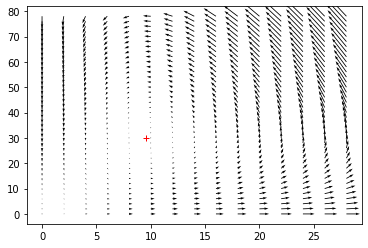

In [7]:
plt.quiver(mesh[0], mesh[1], vx, vy)
plt.plot(gamma/delta, alpha/beta, 'r+') #on place le point d'equilibre non nul
plt.show()

On utilise *streamplot* pour afficher le portrait de phase.

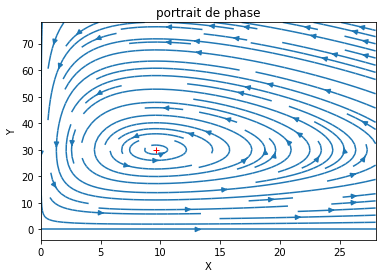

In [8]:
MX = mesh[0]
MY = mesh[1]
plt.streamplot(MX,MY,vx,vy)
plt.plot(gamma/delta, alpha/beta, 'r+') #on place le point d'equilibre non nul
plt.title("portrait de phase")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

On constate que les trajectoires de phase sont fermées et encerclent le point d'équilibre : les solutions vont osciller autour de cet équilibre. On peut faire la même constation avec le champ de vecteur : en s'intéressant à la direction des vecteurs et leur norme, on remarque en effet que les mêmes trajectoires apparaissent.

## Question 3

$f$ définie plus haut et dont nous avons calculé la différentielle en question 1 est $\mathcal{C}^1$ par rapport à $x$ sur $\mathbb{R}^2$. Le théorème de Cauchy-Lipschitz s'applique et nous permet d'affirmer que pour une condition initiale $(t_0,x_0)$, la solution maximale de $S_f(t_0,x_0)$ associée est unique.  
Soit $x_0 \in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$.
On considère la solution maximale de $S_f(t_0,x_0)$, notée  
 $x(t) = (x_1(t), x_2(t))$.  
Supposons l'existence de $t_1 \ne t_0$ dans $\mathcal{D}_x$ (domaine de définition de x) tel que $x(t_1) = (a, 0)$ où $a$ est un réel quelconque. $x$ appartient à $S_f(t_1, (a, 0))$ et en est aussi la solution maximale. 
De plus, on peut définir une autre solution $y$ de la forme $y = (y_1, 0)$. Cette solution existe bien et $y_1$ a la forme d'une exponentielle. On choisit alors comme condition initiale $y(t_1) = (a, 0)$. Cette solution est définie pour tout $t$ dans $\mathbb{R}$, donc sur le même intervalle que $x$. C'est aussi une solution maximale pour $S_f(t_1, (a, 0))$.  
On conclut que $x = y$.
Seulement dans ce cas la condition initiale que l'on avait fixée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ ne sera jamais atteinte par $x$ ce qui est contradictoire.  
Notre hypothèse est donc fausse, il n'existe aucun $t_1$ tel que la coordonnées $x_2$ de $x$ s'annule.
On peut effectuer le même raisonnement avec $x_1$.  
Ainsi, lorsqu'on initialise une solution dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$, elle reste dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$.

## Question 4

On considère $H$ définie sur $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ par :  
 $H(x_1, x_2) = \delta x_1 - \gamma \ln (x_1) + \beta x_2 - \alpha \ln(x_2)$.  
 Cette fonction est $\mathcal{C}^1$ sur son ensemble de définition par somme de fonctions $\mathcal{C}^1$ et:
 $$
 \mathrm{d}H(x_1, x_2) = \begin{pmatrix}
 \delta - \frac{\gamma}{x_1} &
 \beta -\frac{\alpha}{x_2} \end{pmatrix} = \nabla H(x_1, x_2)
 $$

Calculons maintenant $\frac{d}{dt}H(x(t))$.
On a pour tout $x=(x_1, x_2)$ dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$:
$$
\frac{d}{dt}H(x(t)) = \langle \nabla H(x), f(t)\rangle = (\delta - \frac{\gamma}{x_1})x_1(\alpha - \beta x_2) - (\beta - \frac{\alpha}{x_2})x_2(\gamma - \delta x_1) = (\gamma - \delta x_1)(\beta x_2 - \alpha) - (\beta x_2 - \alpha)(\gamma - \delta x_1) = 0
$$

Ainsi, $H$ ne dépend pas du temps. Sa norme est identique quel que soit $t$ dans $\mathbb{R}$.
De plus, le système étudié étant autonome, $f$ ne dépend pas explicitement du temps  non plus et est définie pour tout $t$ dans $\mathbb{R}$.  
On considère pour une condition initiale donnée une solution maximale $x$ définie sur l'intervalle ouvert $]t_m^-, t_m^+[$ avec $t_m^-$ et $t_m^+$ dans $\mathbb{R} \cup \{- \infty, +\infty \}$. Supposons $t_m^-$ fini.  
D'après le théorème du domaine maximal d'existence, $x$ explose en temps fini car si elle atteignait la frontière de $f$, $t_m^-$ serait infini par définition. On a donc $\| x \| \to +\infty$ lorsque $t \to t_m^-$.  
Seulement $\| H(x(t)) \| = |H(x(t))| \ge H(x(t))$ et on sait que $\ln (x) \underset{x \to +\infty}{=} \circ (x)$.  
$H$ adopte le même comportement asymptotique que $\delta x_1 + \beta x_2$ en $t_m^-$.  
Ainsi, $\| H\| \to +\infty$ quand $t \to t_m^-$.  
Ce résultat est en contradicton avec celui énoncé plus haut qui veut que $H$, et donc sa norme ne dépendent pas du temps.  
On en conclut que l'hypothèse de départ est fausse : $t_m^-$ ne peut pas être fini.  
Le même raisonnement nous permet de démontrer que $t_m^+$ est également infini. Finalement, $I = \mathbb{R}$.  
Cela montre bien que toute solution initialisée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ est définie sur $\mathbb{R}$.

## Question 5

On souhaite tracer les lignes de niveaux de la fonction $H$. On commence par coder la fonction, puis on utilise de nouveau *display_contour*.

In [9]:
def H(x1, x2, alpha = alpha,
              beta = beta,
              gamma = gamma,
              delta = delta):
    
    return delta*x1 - gamma*np.log(x1) + beta*x2 - alpha*np.log(x2)

<ipython-input-9-ef9b45cf8722>:6: RuntimeWarning: divide by zero encountered in log
  return delta*x1 - gamma*np.log(x1) + beta*x2 - alpha*np.log(x2)


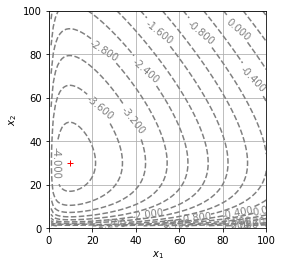

In [10]:
display_contour(
    H, 
    x = np.linspace(0, 100, 100), 
    y = np.linspace(0, 100, 100), 
    levels = 20)

plt.plot(gamma/delta, alpha/beta, 'r+')
plt.show()

On constate que $\bar x$, représenté par la croix rouge, se trouve au centre des courbes de niveaux de $H$. Il se situe dans un creux et son image représente un minimum pour $H$.
De plus, on a montré que les lignes de niveaux de $H$ caractérisaient une solution (la dérivée temporelle de $H$ est nulle le long de cette dernière). Les courbes de niveaux étant fermées autour de $\bar{x}$ si on initialise une solution proche du point d'équilibre, elle restera tout le temps proche de lui.  
Aisni, $\bar{x}$ est bien un point d'équilibre stable au sens de la définition de la stabilité.

## Question 6

In [11]:
def solve_euler_explicit(f, x0, dt, t0, tf):
        x, X = [], x0
        t = np.linspace(t0, tf, int((tf - t0) / dt))
        for j in t:
            X = X + dt*f(X) #on utilise la fonction 
            x.append(X)
        x = np.array(x)
        return t, x

On teste la fonction avec l'équation différentielle $\dot{x}=x$ dont on connait la solution. On fait prendre à $dt$ des valeurs de plus en plus petites pour vérifier la convergence lorsque $dt$ tend vers 0, vers la fonction exponentielle.

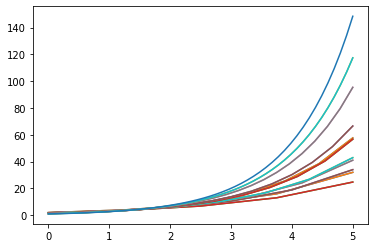

In [12]:
def f(x):
    return x

for dt in range(1000, 1, -100):
    t, x = solve_euler_explicit(f, np.array([1, 1]), dt/1000, 0, 5)
    plt.plot(t, x)
plt.plot(t, [np.exp(j) for j in t])
plt.show()

Pour visualiser graphiquement l'ordre de convergence on trace l'erreur entre la solution obtenue et celle attendue avec des échelles log. Le coefficient directeur de la droite obtenue donne l'ordre de convergence.

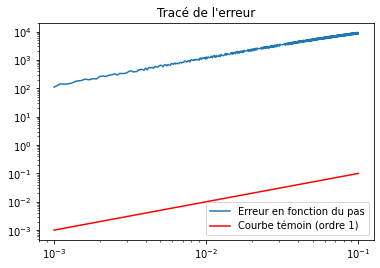

In [13]:
d = np.arange(10**(-3), 10**(-1), 10**(-4))
erreur = []
for dt in d :
    t, x = solve_euler_explicit(f, np.array([1,0]), dt, 0, 10)
    xe = [x[i, 0] for i in range(0,len(x)) ] # on extrait x(t)
    Eps = max(abs(np.exp(t) - xe)) # erreur max commise max|exp(t) - x(t)|
    erreur.append(Eps)

plt.loglog(d, erreur, label = 'Erreur en fonction du pas')
plt.loglog(d, d, color='r', label ="Courbe témoin (ordre 1)") 
plt.title("Tracé de l'erreur")
plt.legend()
plt.show()

La courbe témoin et celle qui correspond à l'erreur en fonction du pas ont le même coefficient directeur.  
L'ordre de convergence est 1.

## Question 7

On applique la fonction solve_euler_explicite aux équations de Lotka-Volterra.

Durant toute la suite, le nombre de proies est représenté en bleu et celui de prédateurs en orange.

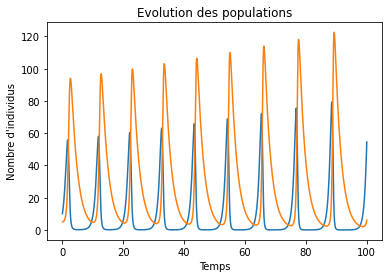

In [14]:
t, x = solve_euler_explicit(LV, np.array([10,5]), 0.01, 0, 100) #On part d'une situation avec 10 proies et 5 prédateurs
plt.plot(t, x)
plt.title('Evolution des populations')
plt.xlabel('Temps')
plt.ylabel("Nombre d'individus")
plt.show()

En temps long, on constate l'apparition d'un motif périodique mais plus le temps augmente plus le nombre maximum d'individus atteint dans chaque population devient élevé.
Pour savoir si cette évolution est fidèle à celle attendue, on trace l'évolution de $H$ en fonction de $t$.

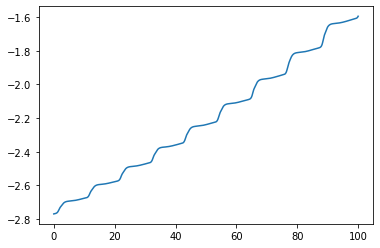

In [76]:
h = [H(x1, x2) for x1, x2 in x]
plt.plot(t, h)
plt.show()

Normalement, $H$ devrait rester constante ce qui n'est pas parfaitement le cas ici (le maximum de chaque motif augmente en temps long), donc ce modèle n'est pas exactement fidèle à la réalité.

## Question 8

On va maintenant utiliser la méthode Euler implicite pour déterminer les solutions du système. Pour cela, on commence par coder une fonction point fixe qui va nous permettre à chaque itération de trouver $x_{j+1}$.

In [43]:
def point_fixe(F, x_j, t_j, dt, itermax, epsilon = 1e-5):
    X = [x_j, F(x_j, x_j, t_j, dt)]
    n = 0
    
    while np.linalg.norm(X[-1] - X[-2])/np.linalg.norm(X[-2]) > epsilon and n <= itermax:
        n += 1
        X.append(F(x_j, X[-1], t_j, dt))
    
    return X[-1]

Ce qui nous permet d'obtenir la fonction suivante :

In [44]:
def solv_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    
    def F(x_j, x, t, dt = dt):
        return x_j + dt*f(x, t + dt)
    
    T = [t0]
    X = [x0]
    
    while T[-1] < tf:
        
        T.append(T[-1] + dt)
        X.append(point_fixe(F, X[-1], T[-1], dt, itermax))
        
    return T, np.array(X)

Pour savoir si notre code fonctionne, on commence par essayer avec des équations connues. Reprenons alors l'exponentielle utilisée pour euler explicite.  
On cherche à résoudre $\dot{x} = x$.  
Ici, $f(x) = x$.

In [45]:
def exponentielle(x, t=0):
    return np.exp(x)

<ipython-input-45-9d4c7d9c6c7f>:2: RuntimeWarning: overflow encountered in exp
  return np.exp(x)
<ipython-input-43-749f39bc73d2>:5: RuntimeWarning: invalid value encountered in double_scalars
  while np.linalg.norm(X[-1] - X[-2])/np.linalg.norm(X[-2]) > epsilon and n <= itermax:


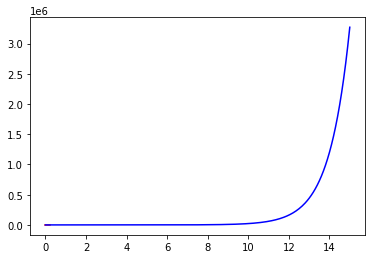

In [46]:
T, X = solv_euler_implicit(exponentielle, 1, 0.05, 0, 15)
plt.plot(T, X, 'r') #on trace le résultat obtenu avec euler implicite
plt.plot(T, np.exp(T), 'b') #on compare avec la fonction exponentielle de numpy
plt.show()

On constate que les deux courbes se superposent parfaitement. Notre fonction converge pour les solutions connues.

On résout ensuite les équations de Lotka-Volterra avec notre Euler implicite.

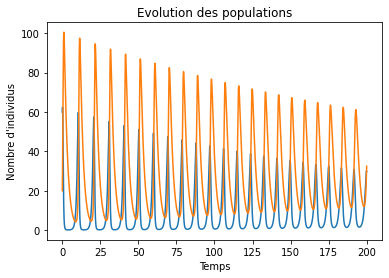

In [75]:
T, X = solv_euler_implicit(LV, np.array([60, 20]), 0.01, 0, 200)
plt.plot(T, X)
plt.title('Evolution des populations')
plt.xlabel('Temps')
plt.ylabel("Nombre d'individus")
plt.show()

On retrouve les cycles de reproduction/mort des proies et prédateurs avec un schéma quasi-identique à chaque cycle. Seulement cette fois, on constate que les solutions convergent vers le point fixe $\bar{x}$. 

On retrace la fonction $H$ pour vérifier si son comportement change.

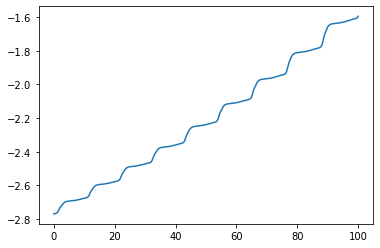

In [47]:
proies, predateurs = X[:, 0], X[:, 1]
plt.plot(T, H(proies, predateurs))
plt.show()

On a toujours le modèle en escalier. Après avoir résolu le problème lié à la convergence du schéma, tachons de nous atteler à la stabilisation de $H$.

## Question 9

On a maintenant le système :
$$
\begin{cases}
\dot x_1 = x_1(\alpha -\beta x_2) - u_1(x_1, x_2)(H(x_1, x_2) - H_0)\\
\dot x_2 = - x_2( \gamma - \delta x_1) - u_2(x_1, x_2)(H(x_1, x_2) - H_0)
\end{cases}
$$
  
    
    
On pose $f_2 = f - (H - H_0) \times u$ ce qui permet de l'écrire $\dot x = f_2(x)$.    
  
Supposons $H_0 = H(x(0))$.  
Si $x$ est une solution du système de Lotka-Volterra, comme $\frac{dH(x(t))}{dt} = 0$, $H(x)$ est constante et on aura :   

$$
\forall t \in \mathcal{D}_x, H(x(t)) = H_0
$$  
Mais alors $f_2 = f$ et $x$ est solution du nouveau système.  
Si maintenant on considère $x$ solution maximale du deuxième système, on peut poser $y$ solution maximale du premier système avec pour condition initiale $y(0) = x(0)$ (qui existe d'après le théorème de Cauchy).  
Mais alors d'après l'implication précédente, $y$ est aussi solution du deuxième système. On obtient alors deux solutions maximales de $S_f(0, x(0))$ qui sont par unicité identiques.  
  
En conclusion, si $H_0 = H(x(0))$, alors les solutions de Lotka-Volterra de $\dot{x} = f_2(x)$ sont identiques.

Ce résultat est vrai pour toute fonction $u : \mathbb{R}_2 \times \mathbb{R}_2 \rightarrow \mathbb{R}_2 \times \mathbb{R}_2$, et en particulier si $u$ est continûment différentiable.



## Question 10

On cherche $\frac{d}{dt}(H(x(t)) - H_0)$. Or :  

$$
\frac{d}{dt}(H(x) - H_0) = \langle \nabla H(x), f_2(t)\rangle
= \langle \nabla H(x(t)), f(x) \rangle - \langle \nabla H(x), (H(x) - H_0)u(x) \rangle
= 0 - (H(x) - H_0) \langle \nabla H(x), u(x) \rangle
$$  

Pour $k \in \mathbb{R}$, en choisissant $u : x \to k \nabla H(x)$, on obtient :  
$$
\frac{d}{dt}(H(x(t)) - H_0) = - k \| \nabla H(x(t)) \|^2 (H(x(t)) - H_0)
$$
ce qui correspond au résultat souhaité.  
  
De plus pour la suite du raisonnement on considère $k$ dans $\mathbb{R}_{>0}$.  

Si maintenant $x$ reste à une distance strictement positive de $\bar{x}$, c'est-à-dire qu'on peut trouver $c > 0$ tel que :  
$$
\forall t \in \mathcal{D}_x, \|x - \bar{x} \| \geq c >0
$$  
On a $\| \nabla H \|^2 = (\delta - \frac{\gamma}{x_1})^2 +(\beta - \frac{\alpha}{x_2})^2$  
et  
$\| x - \bar{x} \|^2 = (\frac{x_1}{\delta})^2(\delta - \frac{\gamma}{x_1})^2 + (\frac{x_2}{\beta})^2(\beta - \frac{\alpha}{x_2})^2$.  

On pose $i = min(\beta, \alpha)$ et on choisit la norme $\|x \| = max(|x_1|, |x_2|)$.  
On a  
$\| x - \bar{x} \|^2 \leq \frac{\|x \|^2}{i^2} \| \nabla H(x) \|^2$.  
D'après la question 4, $\| x \|$ est bornée sur $\mathbb{R}$, on peut considérer $M > 0$ telle que pour tout $t$,  
$\| x(t) \| \leq M$.
On a donc $\frac{i^2c}{M^2} \leq \| \nabla H(x(t)) \|^2$ quel que soit $t$. On pose $c' = \frac{i^2c}{M^2}$ 
  
En reprenant l'inégalité d'au-dessus, et la croissance de la fonction racine carrée, on a :  
$$
\frac{d}{dt}(H(x(t)) - H_0) \leq - kc'(H(x(t)) - H_0)
$$  
Par positivité de la fonction exponentielle on peut multiplier des deux côtés par $e^{kc't}$ les deux membres. On a alors :  
$$
\forall t \in \mathbb{R},  \frac{d}{dt}(e^{kc't}(H(x(t)) - H_0)) \leq 0
$$
Par croissance de l'intégrale on a $a \in \mathbb{R}$ tel que
$$
\forall t \in \mathbb{R}, H(x(t)) - H_0 \leq ae^{-kc't}
$$
De la même manière, en multipliant l'égalité de départ par $-1$, on peut refaire tout le raisonnement avec $H_0 - H(x(t))$ au lieu de $H(x(t)) - H_0$. On aboutit a :
$$
\forall t \in \mathbb{R},  \frac{d}{dt}(e^{kc't}(H_0 - H(x(t)))) \leq 0
$$
On a $b \in \mathbb{R}$ tel que
$$
\forall t \in \mathbb{R}, H_0 - H(x(t))\leq be^{-kc't}
$$
Finalement,
$$
\forall t \in \mathbb{R}, -be^{-kc't} \leq H(x(t)) - H_0 \leq ae^{-kc't}
$$  
On a bien démontré que $H(x)$ converge exponentiellement vers $H_0$ quand $t$ tend vers l'infini par encadrement.

## Question 11

Pour assurer la stabilité de $H$, on utilise le deuxième système $\dot{x} = f_2(x)$, avec $H_0 = H(x(0))$. En effet, on sait que lors de l'implémentation du schéma d'Euler, on a vu que $H$ variait alors qu'elle est censée rester constante. En utilisant ces conditions, on obtient les mêmes solutions que pour Lotka-Volterra en apportant en plus la convergence exponentielle de $H$ vers $H_0$. $H$ ne varie donc plus, l'augmentation des maxima s'arrête. Cela se vérifie plus bas avec les graphiques obtenus.

In [51]:
def f2(x, H0, k, t=0, alpha=alpha, beta=beta, gamma=gamma, delta=delta):
    
    x1, x2 = x
    return LV(x) - (H(x1, x2) - H0)*k*np.array([delta - gamma/x1, beta - alpha/x2])

$k$ représente la vitesse de convergence de $H$ vers $H_0$.  
On modifie l'implémentation d'euler explicite pour adapter aux nouveaux arguments de la fonction $f_2$.

In [52]:
def solve_euler_explicit_2(f, x0, dt, t0, tf, k):
    
    H0 = H(x0[0], x0[1])
    x, X = [], x0
    
    t = np.linspace(t0, tf, int((tf - t0) / dt))
    
    for j in t:
        X = X + dt*f(X, H0, k)
        x.append(X)
        
    x = np.array(x)
    return t, x

On effectue un développement limité de $H$ en $x_{j+1}$.  

$$
H(x_{j+1})-H_0= H(x_j)-H_0+dH(x_j).dtf_2(x_j)+o(dt)\\
H(x_{j+1})-H_0\simeq-(dtk\|\nabla H\|^2-1)(H(x_j)-H_0)\\
\frac{H(x_{j+1})-H(x_j)}{H(x_j)-H_0}=-dtk\|\nabla H\|^2
$$  
Le modèle converge si aucune valeur ne s'éloigne beaucoup de $H_0$. On en déduit que $H(x_{j+1})-H(x_j)$ et $H(x_j)-H_0$ doivent être du même ordre de grandeur, donc leur quotient doit rester proche de 1. Comme on ne maîrtise la norme de $H$ qui est déterminée par les données du problème, on ne peut agir que sur $dt$ et $k$. Donc prendre une valeur de $k$ aussi grande que l'on veut implique de pouvoir prendre une valeur de $dt$ aussi petite que l'on veut. Ceci est impossible car on aurait des problèmes de temps d'éxécution.

In [86]:
k = 35

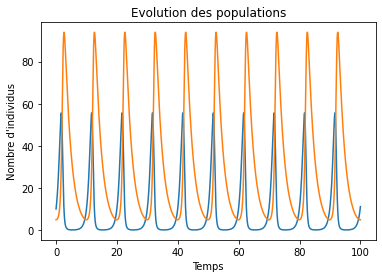

In [90]:
T2, X2 = solve_euler_explicit_2(f2, np.array([10, 5]), 0.01, 0, 100, k)

plt.plot(T2, X2)
plt.title('Evolution des populations')
plt.xlabel('Temps')
plt.ylabel("Nombre d'individus")
plt.show()

On remarque que le maximum atteint à chaque période n'augmente plus. Le problème semble donc résolu. On trace H pour une des deux situations précédentes pour vérifier qu'elle reste constante.

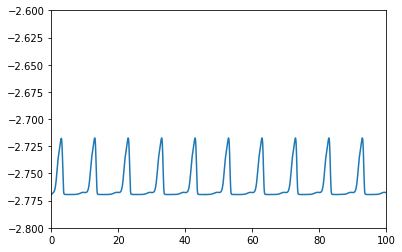

In [91]:
proies, predateurs = X2[:, 0], X2[:, 1]
plt.plot(T2, H(proies, predateurs))
plt.axis([T2[0], T2[-1], -2.8, -2.6])
plt.show()

On remarque que H ne varie quasiment plus. Les variations sont de faibles amplitudes et on revient rapidement à la valeur initiale. On considère donc le problème résolu.